<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%B0%D1%80_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B4%D0%BB%D1%8F_%D1%81%D0%B8%D0%B0%D0%BC%D1%81%D0%BA%D0%B8%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Создание пар изображений для сиамских сетей с помощью Python</b></h1>



<h1 style = "text-align: center;"> <b> Generating image pairs for Siamese networks with Python </b> </h1>



В этом уроке мы научимся создавать пары изображений для обучения сиамских нейронных сетей. Для этого мы реализуем генератор пар изображений с использованием Python, чтобы вы могли использовать один и тот же код независимо от того, используете ли вы TensorFlow, Keras, PyTorch и т. д.

In this tutorial, we will learn how to create pairs of images for training Siamese neural networks. To do this, we will implement an image pair generator using Python so that you can use the same code regardless of whether you are using TensorFlow, Keras, PyTorch, etc.

<h3 style="text-align: center;"><b>Сиамские сети представляют собой особый класс нейронных сетей:</b></h3>







<h3 style = "text-align: center;"> <b> Siamese networks are a special class of neural networks: </b> </h3>



*   Сиамские сети содержат две (или более) идентичные подсети. Siamese networks contain two (or more) identical subnets.
*   Эти подсети имеют одинаковую архитектуру, параметры и веса. These subnets have the same architecture, parameters and weights.
*   Любые обновления параметров отражаются в обеих подсетях, то есть, если вы обновляете веса в одной , то веса и в другой тоже обновляются. Any parameter updates are reflected in both subnets, that is, if you update the weights in one, then the weights in the other are also updated.

Сиамские сети используются в задачах проверки, идентификации и распознавания. 



Siamese networks are used in tasks of verification, identification and recognition.

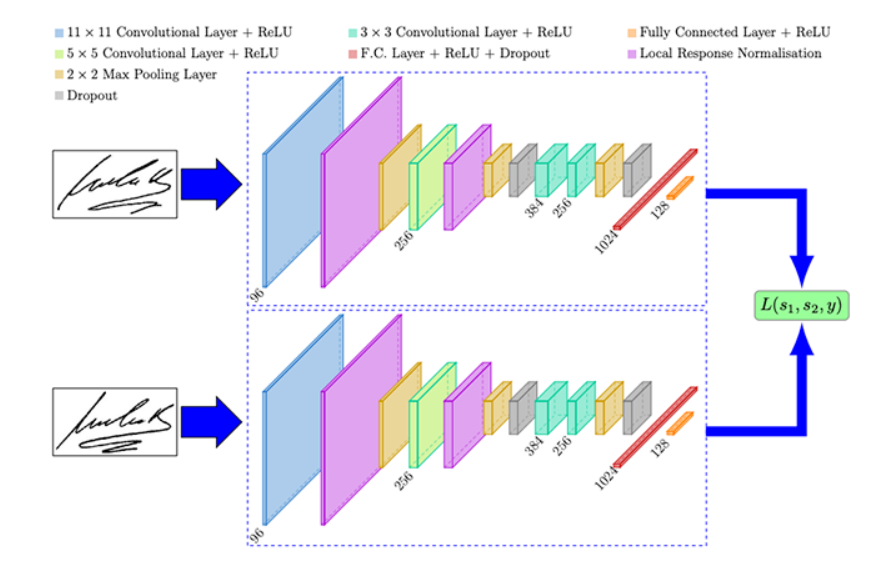

Fig. 1 - An example of the architecture of the Siamese network SigNet used for signature verification.

Рис. 1 - Пример архитектуры  сиамской сети SigNet, используемой для проверки подписи.

<h3 style="text-align: center;"><b>Как работают сиамские сети? </b></h3>




<h3 style = "text-align: center;"> <b> How do Siamese nets work? </b> </h3>



Сиамская сеть состоит из двух подсетей, которые зеркально отражают друг друга.

The Siam network consists of two subnets that mirror each other.

Поскольку существует две подсети, то у нас должно быть два входа для модели.

При обучении сиамских сетей нам нужны положительные и отрицательные пары:

Since there are two subnets, we must have two inputs for the model.

When training Siamese networks, we need positive and negative pairs:

Положительные пары: два изображения, принадлежащих к одному классу (например, два изображения одного и того же человека, два примера одной и той же подписи и т. Д.)

Positive pairs: two images belonging to the same class (e.g. two images of the same person, two examples of the same signature, etc.)

Отрицательные пары: два изображения, принадлежащие разным классам (например, два изображения разных людей, два примера с разными сигнатурами и т. Д.)

Negative pairs: two images belonging to different classes (for example, two images of different people, two examples with different signatures, etc.)

При обучении нашей сиамской сети мы случайным образом отбираем примеры положительных и отрицательных пар. Эти пары служат в качестве обучающих данных, так что сиамская сеть может изучить сходство. Если пары изображений совпадают, то сеть выдает ответ "да", если не совпадают, то ответ "нет".



When training our Siamese network, we randomly select examples of positive and negative pairs. These pairs serve as training data so that the Siamese network can learn the similarities. If the pairs of images match, then the network gives the answer "yes", if they do not match, then the answer is "no".

### Загрузите zip-файл с кодом

### Download the code zip file

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_1.Building_image_pairs_for_siamese_networks_with_Python.zip
!unzip -qq Lesson_1.Building_image_pairs_for_siamese_networks_with_Python.zip

--2022-02-21 08:42:57--  http://dataudt.ru/datasets/cv/Lesson_1.Building_image_pairs_for_siamese_networks_with_Python.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3481 (3.4K) [application/zip]
Saving to: ‘Lesson_1.Building_image_pairs_for_siamese_networks_with_Python.zip’

Lesson_1.Building_i 100%[===================>]   3.40K  --.-KB/s    in 0s      

2022-02-21 08:42:58 (7.51 MB/s) - ‘Lesson_1.Building_image_pairs_for_siamese_networks_with_Python.zip’ saved [3481/3481]



### Установите необходимые библиотеки

### Import Packages

In [2]:
# импортируем необходимые библиотеки
# import the necessary packages
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Функция для отображения изображений в Jupyter Notebooks и Google Colab

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# конвертируем изображение из формата BGR в RGB и отображаем его 
    # convert the image frame BGR to RGB color space and display it
	plt.figure(figsize=(12, 12))
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Реализация нашего генератора пар изображений для сиамских сетей

### Implementing our image pair generator for siamese networks

In [4]:
def make_pairs(images, labels):
	# создаем два пустых списка  	
    # для хранения пар изображений
    # initialize two empty lists to hold the (image, image) pairs and
	pair_images = []
    # для классов, показывающих является ли пара положительной или отрицательной 
    # labels to indicate if a pair is positive or negative
	pair_labels = []

    # вычисляем общее количество классов, представленных в датасете 
    # calculate the total number of classes present in the dataset
	num_classes = len(np.unique(labels))
    # создаем список индексов для каждой метки класса,
    # в котором есть индексы для каждого примера с заданной меткой
    # and then build a list of indexes for each class label that
	# provides the indexes for all examples with a given label
	idx = [np.where(labels == i)[0] for i in range(0, num_classes)]

	
    # проходим циклом через все изображения 
    # loop over all images
	for idxA in range(len(images)):
		# выбираем изображение и метку, принадлежащих текущей итерации  
        # grab the current image and label belonging to the current
		# iteration
		current_image = images[idxA]
		label = labels[idxA]
    
		# случайно выбираем изображение, которое принадлежит *тому же* классу
        # randomly pick an image that belongs to the *same* class
		# label
		idxB = np.random.choice(idx[label])
		pos_image = images[idxB]
    
		# подготавливаем позитивную пару и обновляем изображения и индексы 
        # prepare a positive pair and update the images and labels
		# lists, respectively
		pair_images.append([current_image, pos_image])
		pair_labels.append([1])
    
        # получаем индексы для каждой из меток классов *не* равных текущей метке
        # случайным образом выбираем изображение с меткой, *не* равной текущей метке
        # grab the indices for each of the class labels *not* equal to
		# the current label and randomly pick an image corresponding
		# to a label *not* equal to the current label
		negIdx = np.where(labels != label)[0]
		neg_image = images[np.random.choice(negIdx)]
        
		# подготавливаем негативную пару и обновляем списки 
        # prepare a negative pair of images and update our lists
		pair_images.append([current_image, neg_image])
		pair_labels.append([0])
  
	# возвращаем кортеж, состоящий из пары изображений и их меток 
    # return a 2-tuple of our image pairs and labels
	return (np.array(pair_images), np.array(pair_labels))

In [5]:
# загружаем MNIST датасет и нормируем значения пикселей в диапазоне от 0 до 1 
# load MNIST dataset and scale the pixel values to the range of [0, 1]
print("[INFO] loading MNIST dataset...")
(trainX, trainY), (testX, testY) = mnist.load_data()

# создаем позитивную и негативную пары изображений 
# build the positive and negative image pairs
print("[INFO] preparing positive and negative pairs...")
(pairTrain, labelTrain) = make_pairs(trainX, trainY)
(pairTest, labelTest) = make_pairs(testX, testY)

# инициализируем список выходных изображений, которые будут использоваться при построении нашего коллажа
# initialize the list of images that will be used when building our
# montage
images = []

[INFO] loading MNIST dataset...
11501568/11490434 [==============================] - 0s 0us/step
[INFO] preparing positive and negative pairs...


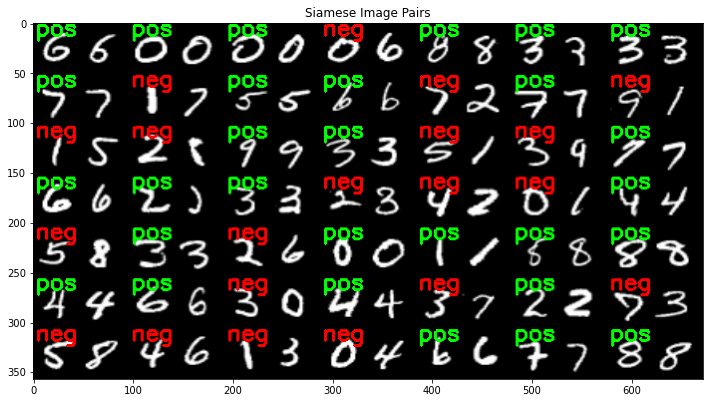

In [6]:
# проходим циклом через образец наших обучающих пар
# loop over a sample of our training pairs
for i in np.random.choice(np.arange(0, len(pairTrain)), size=(49,)):
	# выбираем текущие изображение и метку 
    # grab the current image pair and label
	imageA = pairTrain[i][0]
	imageB = pairTrain[i][1]
	label = labelTrain[i]

    # чтобы было легче визуализировать пары и их позитивный или негативный комментарий
    # добавим к паре 4 пикселя по верхней, нижней и правой границам соответственно
    # to make it easier to visualize the pairs and their positive or
	# negative annotations, we're going to "pad" the pair with four
	# pixels along the top, bottom, and right borders, respectively
	output = np.zeros((36, 60), dtype="uint8")
	pair = np.hstack([imageA, imageB])
	output[4:32, 0:56] = pair

	# выделим разными цветами текстовую метку пары 
	# (зеленый цвет означает "положительную" пару, красный - "отрицательную" пару)
    # set the text label for the pair along with what color we are
	# going to draw the pair in (green for a "positive" pair and
	# red for a "negative" pair)
	text = "neg" if label[0] == 0 else "pos"
	color = (0, 0, 255) if label[0] == 0 else (0, 255, 0)
  
	# создаем 3-канальное RGB изображение пары из оттенков серого 
	# изменяем размер с 28x28 до 96x51 пикселей (чтобы было лучше видно)
	# отрисовываем тип пары на данном изображении 
    # create a 3-channel RGB image from the grayscale pair, resize
	# it from 28x28 to 96x51 (so we can better see it), and then
	# draw what type of pair it is on the image
	vis = cv2.merge([output] * 3)
	vis = cv2.resize(vis, (96, 51), interpolation=cv2.INTER_LINEAR)
	cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)
  
	# добавляем визуализацию пары в наш список выходных изображений 
    # add the pair visualization to our list of output images
	images.append(vis)

# создаем коллаж с получившимися изображениями 
# construct the montage for the images
montage = build_montages(images, (96, 51), (7, 7))[0]

# визуализируем готовый коллаж 
# show the output montage
plt_imshow("Siamese Image Pairs", montage)